## Probability — key distributions

---



**Goal:**
- Visualize PMF/PDF and CDF of important distributions
- Highlight parameters and how they affect shape, mean, variance
- Illustrate (via sampling) LLN/CLT in an intuitive way

In [ ]:
import math #for the mathematical tools
import numpy as np #for the mathematical tools
import matplotlib.pyplot as plt #for plots
from scipy.stats import (
    bernoulli, binom, geom, poisson,
    uniform, expon, norm, gamma, beta, lognorm
) #with this we import all the probability distribution we need

In [ ]:
# -----------------------------
# Functions that need as utilities, to better express everything
# -----------------------------
def style_axes(ax, title, xlabel="", ylabel=""):
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True, alpha=0.3)

def summarize_distribution(name, dist, moments=True):
    """Print mean/variance (if available)."""
    print(f"\n=== {name} ===")
    if moments:
        try:
            m, v = dist.stats(moments="mv")
            print(f"Theoretical mean: {float(m):.6g}")
            print(f"Theoretical variance: {float(v):.6g}")
        except Exception:
            print("Mean/variance not available for this instance.")

def show_discrete(ax_pmf, ax_cdf, name, xs, pmf, cdf):
    ax_pmf.vlines(xs, 0, pmf, lw=2)
    ax_pmf.plot(xs, pmf, "o")
    style_axes(ax_pmf, f"{name} — PMF", "k", "P(X=k)")

    ax_cdf.step(xs, cdf, where="post")
    ax_cdf.set_ylim(-0.05, 1.05)
    style_axes(ax_cdf, f"{name} — CDF", "k", "F(k)")

def show_continuous(ax_pdf, ax_cdf, name, x, pdf, cdf):
    ax_pdf.plot(x, pdf, lw=2)
    style_axes(ax_pdf, f"{name} — PDF", "x", "f(x)")

    ax_cdf.plot(x, cdf, lw=2)
    ax_cdf.set_ylim(-0.05, 1.05)
    style_axes(ax_cdf, f"{name} — CDF", "x", "F(x)")

def plot_samples_overlay(ax, x, pdf, samples, name):
    ax.plot(x, pdf, lw=2, label="Theoretical PDF")
    ax.hist(samples, bins=40, density=True, alpha=0.35, label="Sample histogram")
    ax.legend()
    style_axes(ax, f"{name} — PDF vs samples", "x", "density")

def seed_everything(seed=7): #this fix the seed for random variables, for different runs, we get the same values
    np.random.seed(seed)


We now analyze different *discrete Random Variables*: Bernoulli, Binomial, Geometric, Poisson. We will plot the **PMF** and the **CDF** for each probability distribution in a single figure with different panels.

In [ ]:
def demo_discrete():
    fig, axes = plt.subplots(4, 2, figsize=(11, 14), constrained_layout=True)

    # Bernoulli(p)
    p_list = [0.2, 0.5, 0.8]
    xs = np.array([0, 1])
    ax_pmf, ax_cdf = axes[0]
    for p in p_list:
        d = bernoulli(p)
        pmf = d.pmf(xs)
        cdf = d.cdf(xs)
        ax_pmf.plot(xs, pmf, "o", label=f"p={p}")
        ax_cdf.step(xs, cdf, where="post", label=f"p={p}") #plot a step function where the jump is post the value
    ax_pmf.set_ylim(0, 1.05)
    ax_cdf.set_ylim(-0.05, 1.05)
    ax_pmf.legend(); ax_cdf.legend()
    style_axes(ax_pmf, "Bernoulli(p) — PMF", "k", "P(X=k)")
    style_axes(ax_cdf, "Bernoulli(p) — CDF", "k", "F(k)")
    summarize_distribution("Bernoulli(p=0.5)", bernoulli(0.5))

    # Binomial(n, p)
    n, p = 20, 0.3
    d = binom(n, p)
    xs = np.arange(0, n + 1)
    pmf, cdf = d.pmf(xs), d.cdf(xs)
    show_discrete(axes[1, 0], axes[1, 1], f"Binomial(n={n}, p={p})", xs, pmf, cdf)
    summarize_distribution(f"Binomial(n={n}, p={p})", d)

    # Geometric(p) (support: 1,2,3,... in SciPy)
    p = 0.35
    d = geom(p)
    xs = np.arange(1, 26)
    pmf, cdf = d.pmf(xs), d.cdf(xs)
    show_discrete(axes[2, 0], axes[2, 1], f"Geometric(p={p})", xs, pmf, cdf)
    summarize_distribution(f"Geometric(p={p})", d)

    # Poisson(λ)
    lam = 4.0
    d = poisson(lam)
    xs = np.arange(0, 21)
    pmf, cdf = d.pmf(xs), d.cdf(xs)
    show_discrete(axes[3, 0], axes[3, 1], f"Poisson(λ={lam})", xs, pmf, cdf)
    summarize_distribution(f"Poisson(λ={lam})", d)

    fig.suptitle("Discrete distributions: PMF and CDF (parameters and shape)", fontsize=16)
    plt.show()

Now we run the function in order to see its functioning. In the first column there are the PMF and in the second one the CDF. One can change the parameter of the distribution to see how the results change.


=== Bernoulli(p=0.5) ===
Theoretical mean: 0.5
Theoretical variance: 0.25

=== Binomial(n=20, p=0.3) ===
Theoretical mean: 6
Theoretical variance: 4.2

=== Geometric(p=0.35) ===
Theoretical mean: 2.85714
Theoretical variance: 5.30612

=== Poisson(λ=4.0) ===
Theoretical mean: 4
Theoretical variance: 4


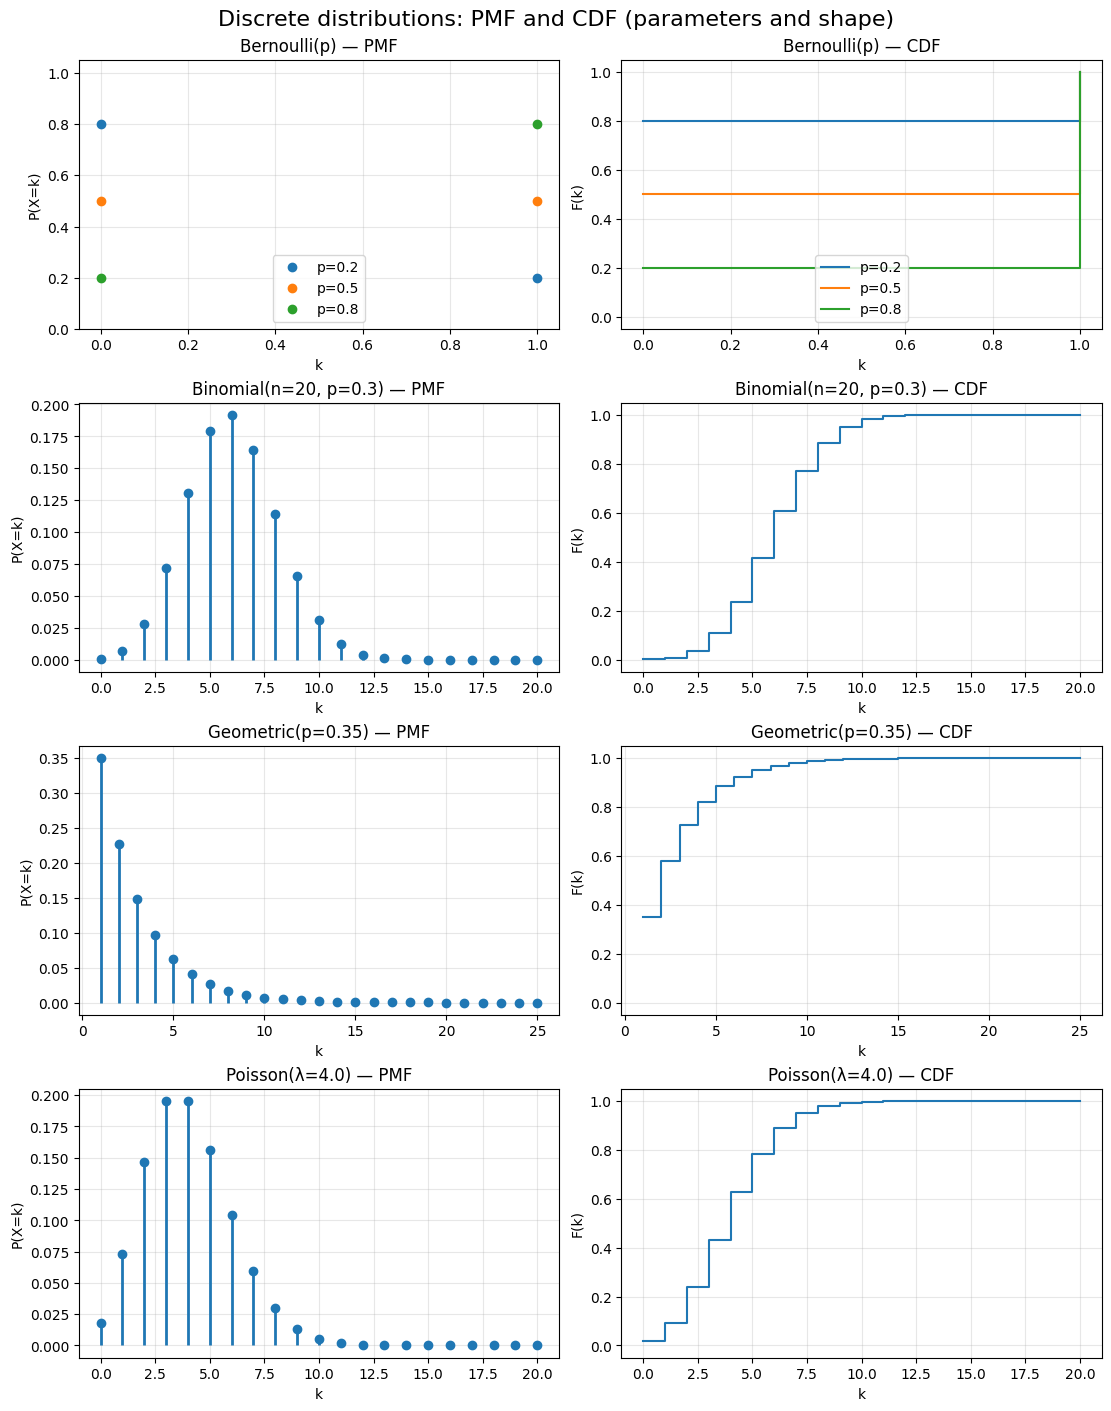

In [ ]:
demo_discrete()

We now pass to continuous *Random Variabiles*: Uniform, Exponential, Normal and Gamma. We proceed in the same way we have done in Discrete RVs.

In [ ]:
def demo_continuous():
    fig, axes = plt.subplots(4, 2, figsize=(11, 14), constrained_layout=True)

    # Uniform(a,b)
    a, b = -1, 2
    d = uniform(loc=a, scale=b - a)
    x = np.linspace(a - 1, b + 1, 500)
    show_continuous(axes[0, 0], axes[0, 1], f"Uniform(a={a}, b={b})", x, d.pdf(x), d.cdf(x))
    summarize_distribution(f"Uniform(a={a}, b={b})", d)

    # Exponential(λ) — in SciPy: scale = 1/λ
    lam = 1.2
    d = expon(scale=1 / lam)
    x = np.linspace(0, 8, 500)
    show_continuous(axes[1, 0], axes[1, 1], f"Exponential(λ={lam})", x, d.pdf(x), d.cdf(x))
    summarize_distribution(f"Exponential(λ={lam})", d)

    # Normal(μ, σ)
    mu, sigma = 0.0, 1.5
    d = norm(loc=mu, scale=sigma)
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 700)
    show_continuous(axes[2, 0], axes[2, 1], f"Normal(μ={mu}, σ={sigma})", x, d.pdf(x), d.cdf(x))
    summarize_distribution(f"Normal(μ={mu}, σ={sigma})", d)

    # Gamma(k, θ) — in SciPy: a=k, scale=θ
    k, theta = 3.0, 1.2
    d = gamma(a=k, scale=theta)
    x = np.linspace(0, 15, 700)
    show_continuous(axes[3, 0], axes[3, 1], f"Gamma(k={k}, θ={theta})", x, d.pdf(x), d.cdf(x))
    summarize_distribution(f"Gamma(k={k}, θ={theta})", d)

    fig.suptitle("Continuous distributions: PDF and CDF (parameters and shape)", fontsize=16)
    plt.show()


Now we run the function in order to see its functioning. In the first column there are the PMF and in the second one the CDF. One can change the parameter of the distribution to see how the results change.


=== Uniform(a=-1, b=2) ===
Theoretical mean: 0.5
Theoretical variance: 0.75

=== Exponential(λ=1.2) ===
Theoretical mean: 0.833333
Theoretical variance: 0.694444

=== Normal(μ=0.0, σ=1.5) ===
Theoretical mean: 0
Theoretical variance: 2.25

=== Gamma(k=3.0, θ=1.2) ===
Theoretical mean: 3.6
Theoretical variance: 4.32


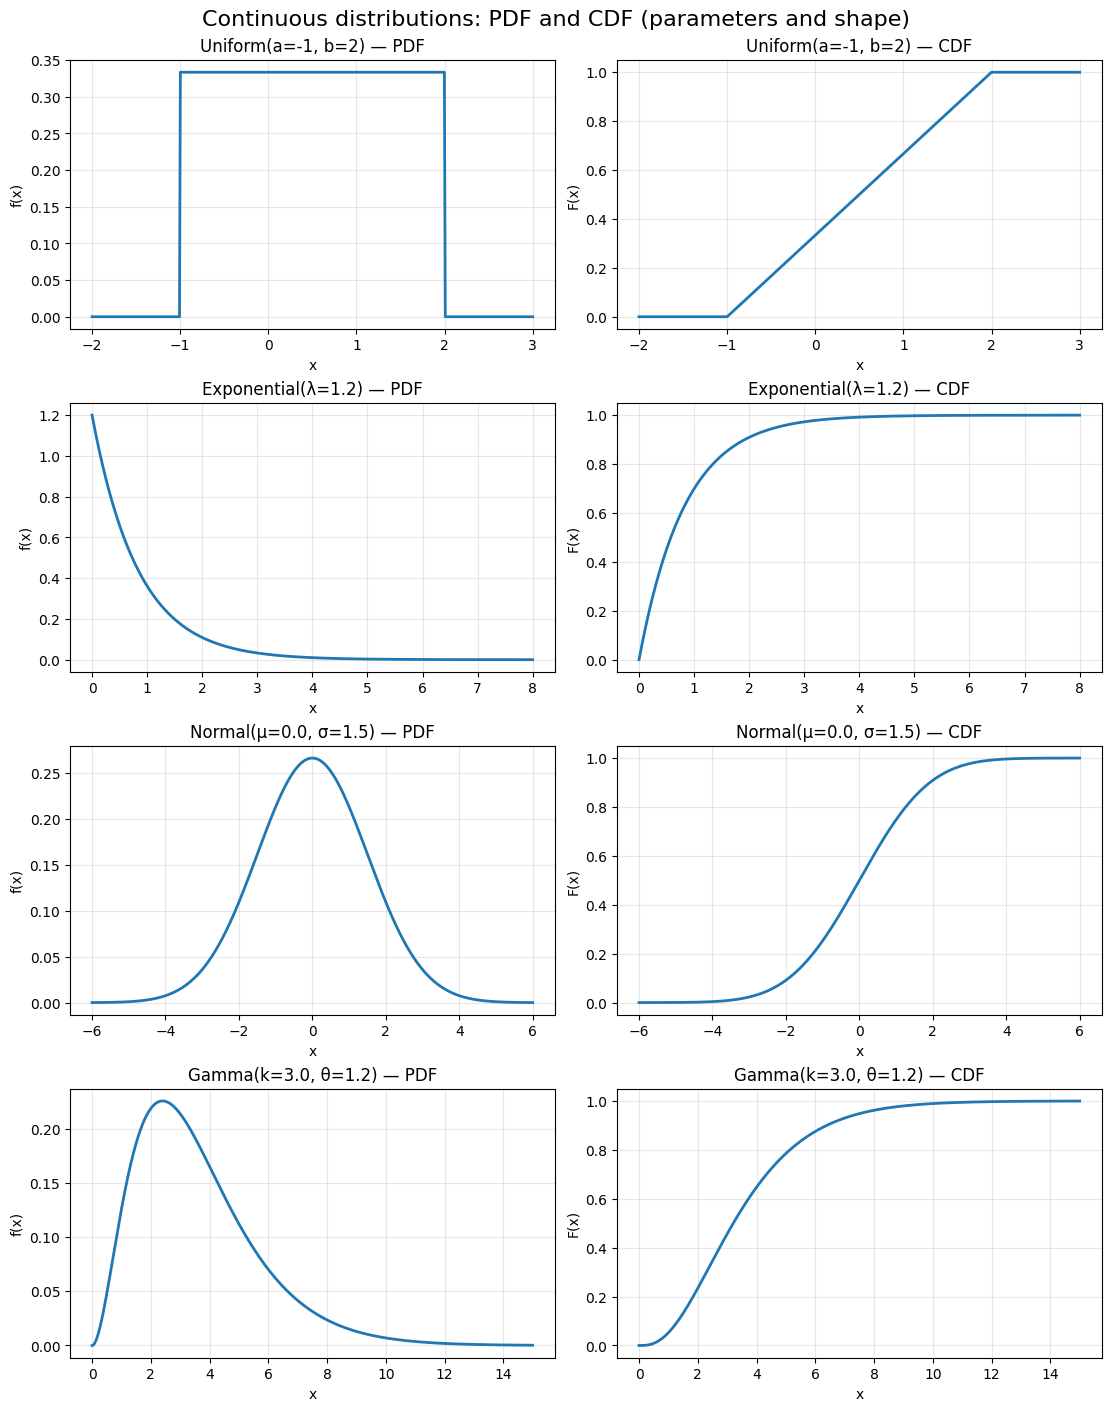

In [ ]:
demo_continuous()

We now want to analyze the role of the parameters for Poisson, Binomial, Normal and Beta distributions. We will plot different PMF for different parameters in each panel.

In [ ]:
def demo_parameter_effects():
    fig, axes = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)

    # Poisson: varying λ
    ax = axes[0, 0]
    for lam in [1, 3, 8]:
        d = poisson(lam)
        xs = np.arange(0, 25)
        ax.plot(xs, d.pmf(xs), "o-", label=f"λ={lam}")
    ax.legend()
    style_axes(ax, "Poisson — effect of λ", "k", "P(X=k)")

    # Binomial: varying p (fixed n)
    ax = axes[0, 1]
    n = 20
    xs = np.arange(0, n + 1)
    for p in [0.2, 0.5, 0.8]:
        d = binom(n, p)
        ax.plot(xs, d.pmf(xs), "o-", label=f"p={p}")
    ax.legend()
    style_axes(ax, f"Binomial — effect of p (n={n})", "k", "P(X=k)")

    # Normal: varying σ (fixed μ)
    ax = axes[1, 0]
    mu = 0
    x = np.linspace(-6, 6, 700)
    for sigma in [0.7, 1.2, 2.0]:
        d = norm(loc=mu, scale=sigma)
        ax.plot(x, d.pdf(x), lw=2, label=f"σ={sigma}")
    ax.legend()
    style_axes(ax, "Normal — effect of σ (μ=0)", "x", "f(x)")

    # Beta: very different shapes
    ax = axes[1, 1]
    x = np.linspace(0, 1, 700)
    params = [(0.5, 0.5), (2, 2), (2, 5), (5, 2)]
    for a, b in params:
        d = beta(a=a, b=b)
        ax.plot(x, d.pdf(x), lw=2, label=f"α={a}, β={b}")
    ax.legend()
    style_axes(ax, "Beta — shapes as (α,β) vary", "x", "f(x)")

    fig.suptitle("How parameters affect distribution shape", fontsize=16)
    plt.show()

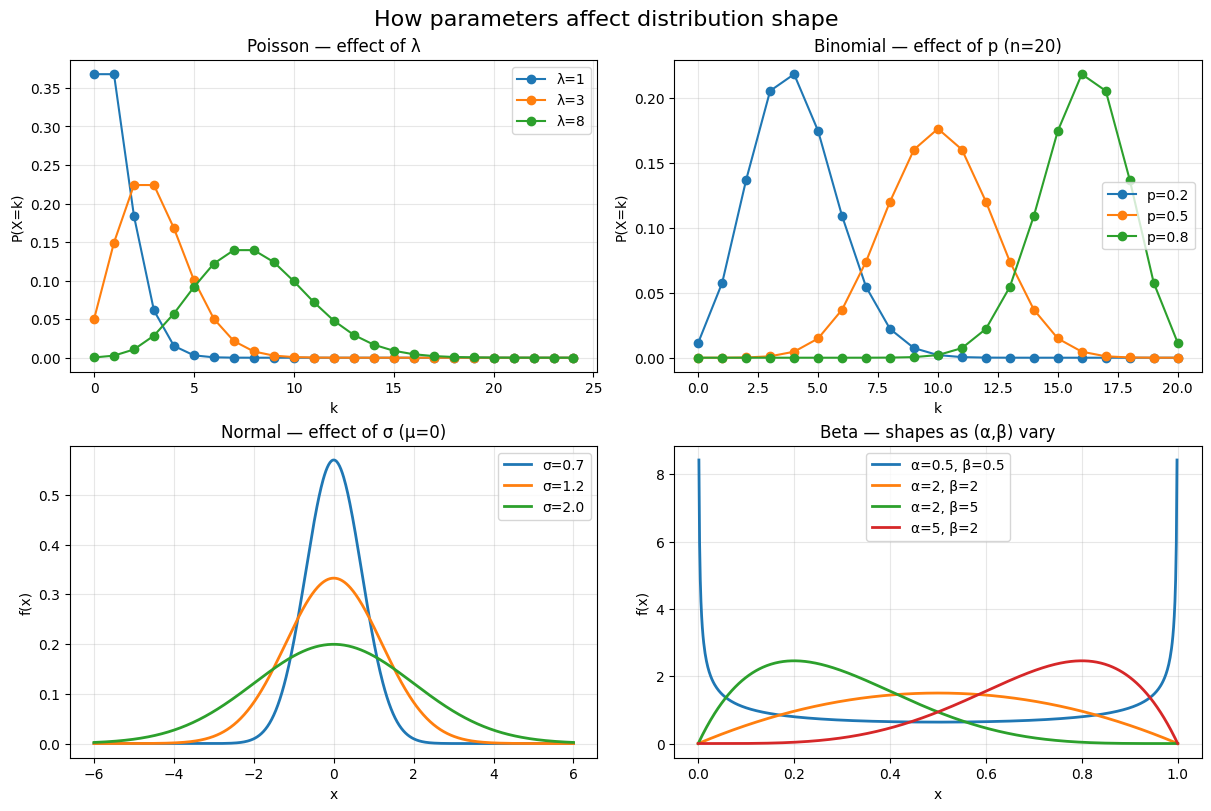

In [ ]:
demo_parameter_effects()

Until now, we have analyze the theoretical structure of this distribution. Now we wonder if we sample the data from the distributions under exam (Normal, Exponential, Poisson  and Lognormal) we get the same distribution seen before.

In [ ]:
def demo_theory_vs_samples():
    seed_everything(7) #we fix the seed to have always the same result
    N = 4000

    fig, axes = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)

    # Normal
    d = norm(loc=1.0, scale=2.0)
    samples = d.rvs(size=N) #rvs is random variates: generate random numbers from the distribution d
    x = np.linspace(-7, 9, 700)
    plot_samples_overlay(axes[0, 0], x, d.pdf(x), samples, "Normal(1,2)")

    # Exponential
    d = expon(scale=1/1.5)
    samples = d.rvs(size=N)
    x = np.linspace(0, 8, 700)
    plot_samples_overlay(axes[0, 1], x, d.pdf(x), samples, "Exponential(λ=1.5)")

    # Poisson (discrete): histogram vs PMF
    ax = axes[1, 0]
    d = poisson(5.0)
    samples = d.rvs(size=N)
    xs = np.arange(0, 20)
    ax.vlines(xs, 0, d.pmf(xs), lw=2, label="Theoretical PMF")
    ax.hist(samples, bins=np.arange(-0.5, 20.5, 1), density=True, alpha=0.35, label="Sample histogram")
    ax.legend()
    style_axes(ax, "Poisson(λ=5) — PMF vs samples", "k", "mass/density")

    # Lognormal (often used in applications)
    ax = axes[1, 1]
    # SciPy lognorm: shape = sigma, scale = exp(mu)
    mu, sigma = 0.0, 0.6
    d = lognorm(s=sigma, scale=math.exp(mu))
    samples = d.rvs(size=N)
    x = np.linspace(0, np.quantile(samples, 0.99), 700)
    plot_samples_overlay(ax, x, d.pdf(x), samples, f"Lognormal(μ={mu}, σ={sigma})")

    fig.suptitle("Theory vs samples: histograms and theoretical curves", fontsize=16)
    plt.show()

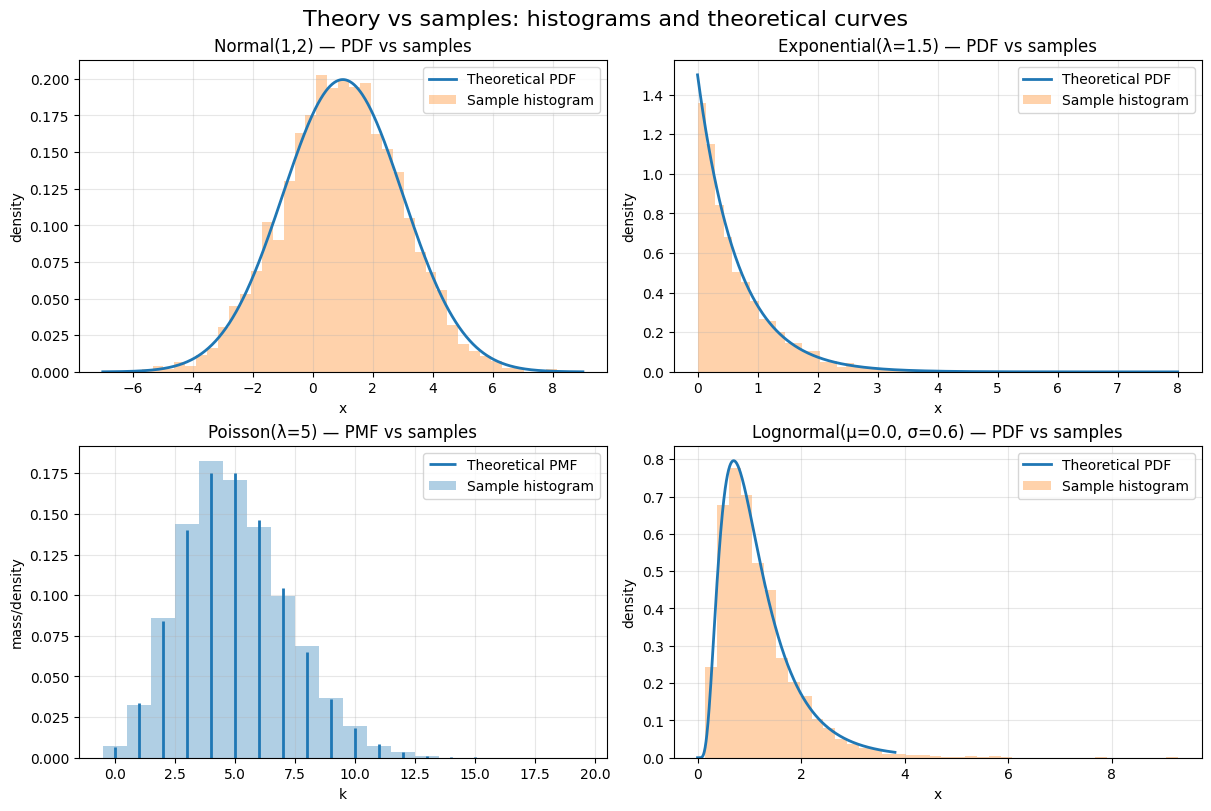

In [ ]:
demo_theory_vs_samples()

Now we analyze the MGF for the Bernoullian, Binomian and Poisson RVs, and the characteristic function for the Normal distribution.

In [ ]:
def demo_mgf_cf():
    """
    Visualizations:
    - Moment Generating Function (MGF) M_X(t)=E[e^{tX}] for discrete distributions
      * Vertical line at t=0 to emphasize M_X(0)=1
      * Separate panels + comparison with logarithmic y-axis
    - Characteristic function φ_X(t)=E[e^{itX}] for the Normal distribution
      * Real part, imaginary part, and modulus
      * Explicit emphasis that |φ(t)| = exp(-σ^2 t^2 / 2), depending only on σ
    """

    # ------------------------------------------------------------
    # MGF for discrete distributions
    # ------------------------------------------------------------
    t = np.linspace(-1.0, 1.0, 600)

    # Bernoulli(p): M(t) = (1-p) + p e^t
    p = 0.3
    M_bern = (1 - p) + p * np.exp(t)

    # Binomial(n,p): M(t) = ((1-p) + p e^t)^n
    n, p2 = 20, 0.3
    M_binom = ((1 - p2) + p2 * np.exp(t)) ** n

    # Poisson(λ): M(t) = exp(λ(e^t - 1))
    lam = 4.0
    M_pois = np.exp(lam * (np.exp(t) - 1))

    fig, axes = plt.subplots(1, 3, figsize=(15, 4), constrained_layout=True)

    axes[0].plot(t, M_bern, lw=2)
    axes[0].axvline(0, lw=1.5, linestyle="--", color="gray")
    axes[0].axhline(1, lw=1.5, linestyle=":", color="gray")
    style_axes(axes[0], f"MGF — Bernoulli(p={p})", "t", "M_X(t)")
    axes[0].text(0.02, 1.02, "M(0)=1", transform=axes[0].transAxes)

    axes[1].plot(t, M_binom, lw=2)
    axes[1].axvline(0, lw=1.5, linestyle="--", color="gray")
    axes[1].axhline(1, lw=1.5, linestyle=":", color="gray")
    style_axes(axes[1], f"MGF — Binomial(n={n}, p={p2})", "t", "M_X(t)")
    axes[1].text(0.02, 1.02, "M(0)=1", transform=axes[1].transAxes)

    axes[2].plot(t, M_pois, lw=2)
    axes[2].axvline(0, lw=1.5, linestyle="--", color="gray")
    axes[2].axhline(1, lw=1.5, linestyle=":", color="gray")
    style_axes(axes[2], f"MGF — Poisson(λ={lam})", "t", "M_X(t)")
    axes[2].text(0.02, 1.02, "M(0)=1", transform=axes[2].transAxes)

    fig.suptitle(
        "Moment Generating Functions (discrete): M_X(0)=1 for all distributions",
        fontsize=14
    )
    plt.show()

    #Comparison with logarithmic y-axis
    plt.figure(figsize=(11, 4))
    plt.plot(t, M_bern, lw=2, label=f"Bernoulli(p={p})")
    plt.plot(t, M_binom, lw=2, label=f"Binomial(n={n}, p={p2})")
    plt.plot(t, M_pois, lw=2, label=f"Poisson(λ={lam})")
    plt.axvline(0, lw=1.5, linestyle="--", color="gray", label="t=0")
    plt.yscale("log")
    plt.legend()
    style_axes(
        plt.gca(),
        "Moment Generating Functions (discrete): comparison (log y-axis)",
        "t",
        "M_X(t) (log scale)"
    )
    plt.show()

    # ------------------------------------------------------------
    # Characteristic function for the Normal distribution
    # ------------------------------------------------------------
    # φ(t) = exp(i μ t − 0.5 σ^2 t^2)
    tt = np.linspace(-10, 10, 1000)
    mu, sigma = 0.0, 1.5
    phi = np.exp(1j * mu * tt - 0.5 * (sigma ** 2) * (tt ** 2))

    # Theoretical modulus (depends only on σ)
    phi_mod_theory = np.exp(-0.5 * (sigma ** 2) * (tt ** 2))

    plt.figure(figsize=(11, 4))
    plt.plot(tt, phi.real, lw=2, label="Re φ(t)")
    plt.plot(tt, phi.imag, lw=2, label="Im φ(t)")
    plt.plot(tt, np.abs(phi), lw=2, label="|φ(t)|")
    plt.plot(
        tt,
        phi_mod_theory,
        lw=2,
        linestyle="--",
        color="black",
        label=r"$e^{-\sigma^2 t^2/2}$"
    )
    plt.legend()
    style_axes(
        plt.gca(),
        f"Characteristic function of the Normal distribution (μ={mu}, σ={sigma})",
        "t",
        "value"
    )
    plt.text(
        0.02, 0.95,
        r"$|\varphi(t)| = e^{-\sigma^2 t^2/2}$ depends only on $\sigma$",
        transform=plt.gca().transAxes,
        verticalalignment="top"
    )
    plt.show()

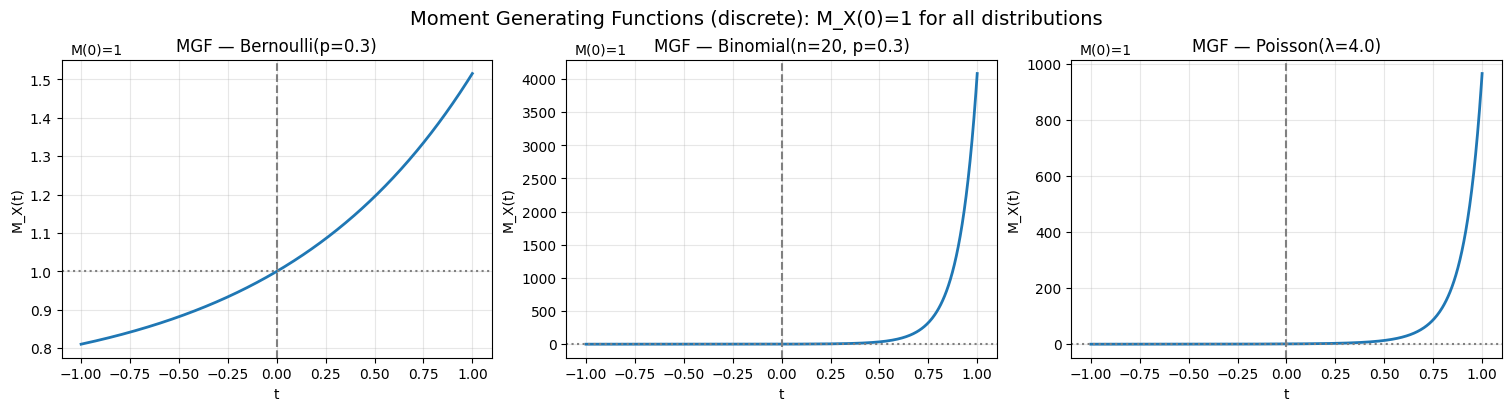

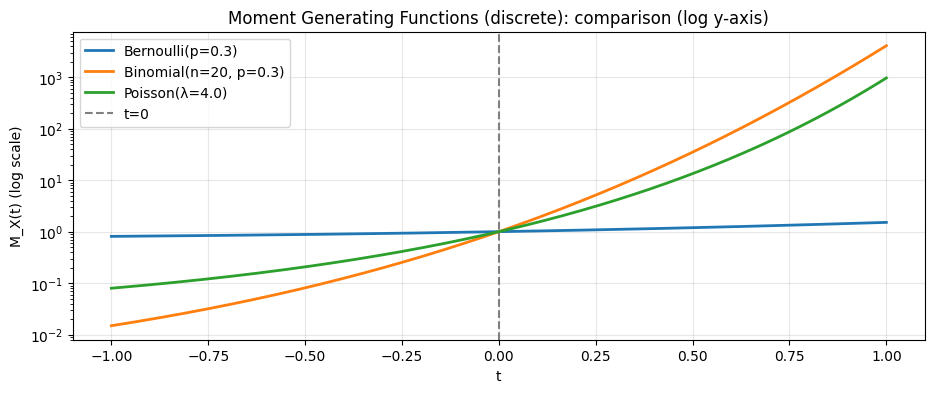

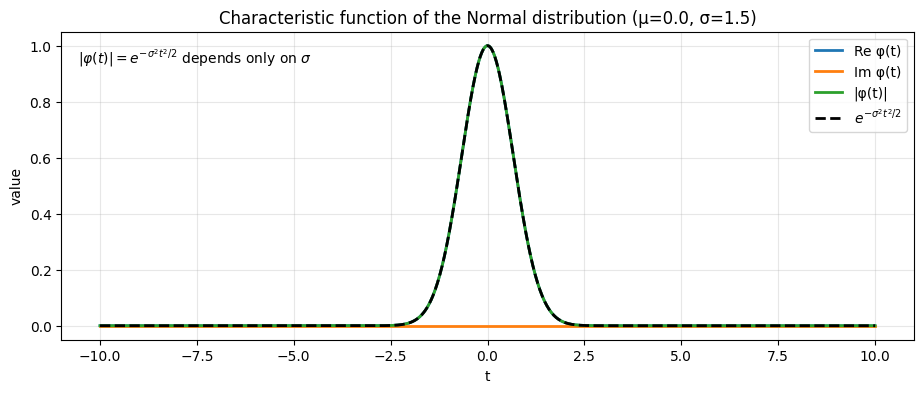

In [ ]:
demo_mgf_cf()

Last but not least, we want to analyze the role of LLN and CLT. We want to see that the empirical average converges to the mean of the distribution for N >> 1 (we cannot do the infinity limit on the code!) and if the fluctuactions around the mean follow the Gaussian distirbution.

In [ ]:
def demo_lln_clt():
    seed_everything(7) #fixing the seed to get always the same result

    # LLN: sample mean converges to theoretical mean
    dist = expon(scale=1/2)  # λ=2 #asymmetric
    true_mean = dist.mean()
    n_max = 2000
    samples = dist.rvs(size=n_max) #this samples from the distribution dist n_max data
    running_mean = np.cumsum(samples) / np.arange(1, n_max + 1)

    plt.figure(figsize=(11, 4))
    plt.plot(running_mean, lw=2)
    plt.axhline(true_mean, lw=2, linestyle="--", label=f"Theoretical mean = {true_mean:.3g}")
    plt.legend()
    style_axes(plt.gca(), "Law of Large Numbers (LLN) — running sample mean", "n", "mean up to n")
    plt.show()

    # CLT: standardized sums/means tend to Normal
    # Use a skewed distribution (exponential) to make the effect visible
    m = 100     # sample size per block
    B = 4000   # number of blocks which are different iid RVs
    blocks = dist.rvs(size=(B, m)) #we made B iid block with m observables
    block_means = blocks.mean(axis=1)

    # Standardization: (Xbar - mu) / (sigma/sqrt(m))
    mu = dist.mean()
    sigma = dist.std()
    z = (block_means - mu) / (sigma / np.sqrt(m))

    x = np.linspace(-4, 4, 700)
    plt.figure(figsize=(11, 4))
    plt.hist(z, bins=45, density=True, alpha=0.35, label="Standardized block means") #alpha=transparency of the bars
    plt.plot(x, norm().pdf(x), lw=2, label="Theoretical N(0,1)")
    plt.legend()
    style_axes(plt.gca(), f"Central Limit Theorem (CLT) — m={m}", "z", "density")
    plt.show()

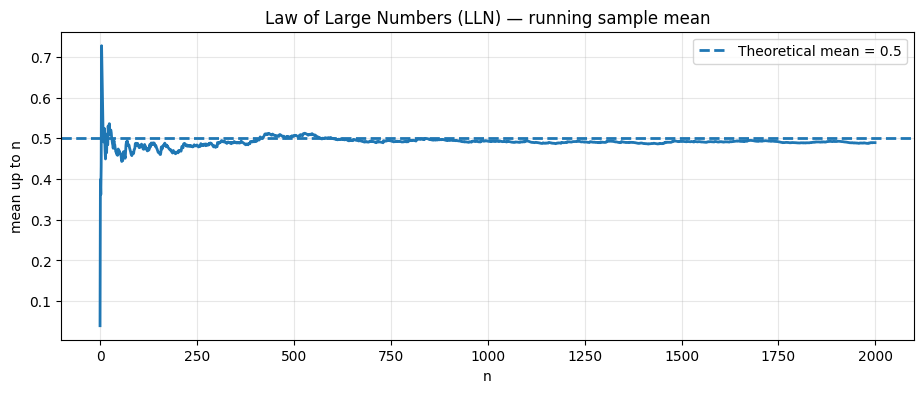

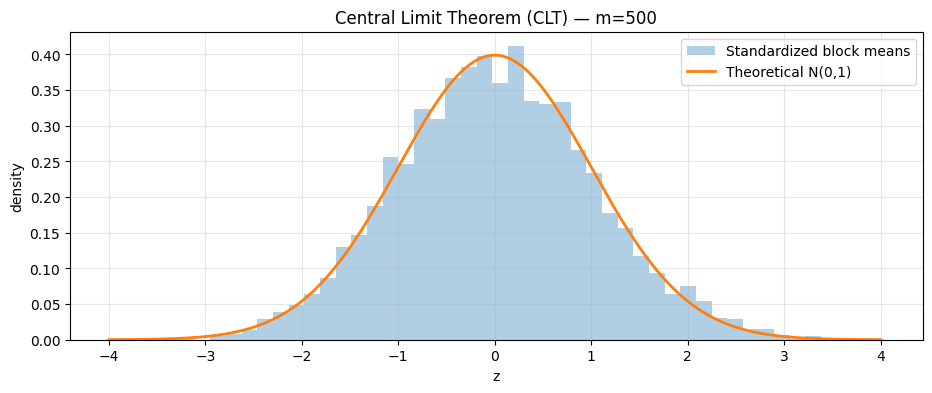

In [ ]:
demo_lln_clt()